In [186]:
from sklearn.datasets import load_iris

In [187]:
iris_dataset = load_iris()

In [188]:
iris_dataset.keys(), iris_dataset.feature_names, iris_dataset.data[:5], iris_dataset.target[:5]

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [189]:
print(type(iris_dataset.data))
iris_dataset.data.shape

<class 'numpy.ndarray'>


(150, 4)

In [190]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np


x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4], iris_dataset['target'], random_state=0)


In [191]:
print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2]
['setosa' 'versicolor' 'virginica']


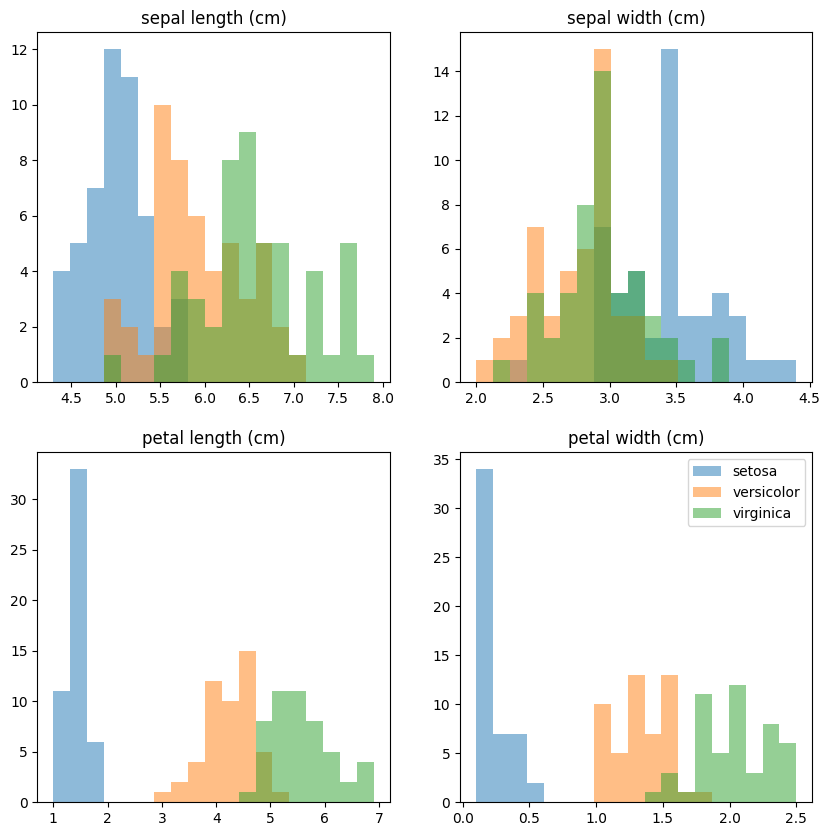

In [213]:
import matplotlib.pyplot as plt
data = iris_dataset['data']
labels = iris_dataset['target']
var_names = iris_dataset['feature_names']
target_names = iris_dataset['target_names']

print(var_names)
print(np.unique(labels))
print(target_names)
fig = plt.figure(figsize=(10,10))

# loop on variables
for i in range(4):
    # create subplot 
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace(np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels): # по всем уникальным элементам т.е 0 1 2 
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend()

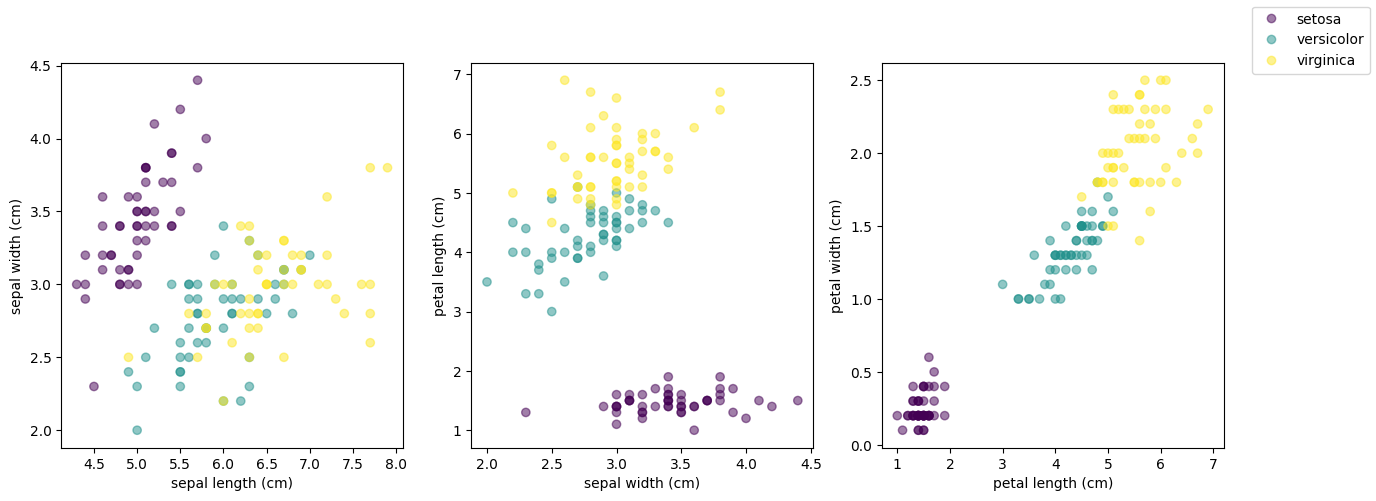

In [214]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    j = i+1
    # we plot variable 1 vs 0, then 2 vs 1, then 3 vs 2
    scatter = axs[i].scatter(data[:,i], data[:, j], c=labels, alpha=0.5)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[j])
elems = list(scatter.legend_elements())
# by default, the legend labels are the values 
# of the target, 0, 1, 2. 
# we replace that with the target names:
elems[1] = target_names
fig.legend(*elems)

In [192]:
#объединили 
x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)
print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

X_train shape: (112, 3),
X_test shape: (38, 3)


In [193]:
import math 

def euclidean_distance(data1, data2):
    distance = 0
    for i in range(len(data1)-1):
        distance +=(data1[i] - data2[i])**2

    return math.sqrt(distance)


def get_neighbors(train, test, k=1):
    distances = [(train[i][-1], euclidean_distance(train[i], test))
                  for i in range (len(train))] # значение класса и расстояние ( , )
    distances.sort(key=lambda elem: elem[1])
    
    neighbors = [distances[i][0] for i in range (k)] # k соседей(классы)
    return neighbors

def prediction(negihbors):
    count = {}
    for instance in negihbors:
        if instance in count:
            count[instance] +=1
        else:
            count[instance] = 1
    target = max(count.items(), key=lambda x: x[1])[0]

    return target 

def accuracy(test, pred):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == pred[i]:
            correct +=1
    return correct/ len(test)

In [194]:
predictions = []
for x in range (len(x_test_concat)):
    neighbors = get_neighbors(x_train_concat, x_test_concat[x], k=5)
    result = prediction(neighbors)
    predictions.append(result)
#     print(f'predicted = {result}, actual = {x_test_concat[x][-1]}') # если есть интерес посмотреть, какие конкретно прогнозы некорректны
accuracy = accuracy(x_test_concat, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736842105263158


In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [196]:
knn_model = knn.fit(x_train, y_train)

In [197]:
knn_pred = knn_model.predict(x_test)
print(knn_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [198]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736842105263158


In [199]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

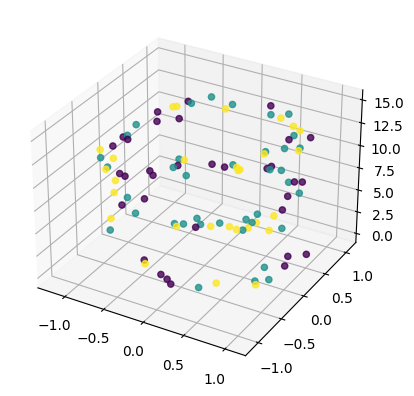

In [200]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

In [201]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(iris_dataset.data[:, 1:4], iris_dataset['target'], random_state=0)